In [1]:
%matplotlib inline

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [93]:
sns.set_style('ticks')
sns.set_context('paper')

In [4]:
res = pd.read_csv('../outputs/bluewaters.csv')

In [5]:
res['nproc'] = res.matsize / res.chunksize

In [12]:
res

,matsize,chunksize,agtime,ringtime,nproc
0,1024,8,0.000065,0.000419,128.0
1,16384,128,0.010182,0.010066,128.0
2,102400,800,0.436150,0.365200,128.0
3,1024,4,0.000401,0.000839,256.0
4,16384,64,0.005822,0.005723,256.0
5,102400,400,0.221420,0.177440,256.0
6,1024,2,0.000952,0.001837,512.0
7,16384,32,0.003673,0.003757,512.0
8,102400,200,0.112940,0.089725,512.0
9,1024,1,0.000140,0.003899,1024.0


In [7]:
for i in res.groupby('matsize'):
    print(i)

(1024,    matsize  chunksize    agtime  ringtime   nproc
0     1024          8  0.000065  0.000419   128.0
3     1024          4  0.000401  0.000839   256.0
6     1024          2  0.000952  0.001837   512.0
9     1024          1  0.000140  0.003899  1024.0)
(16384,     matsize  chunksize    agtime  ringtime   nproc
1     16384        128  0.010182  0.010066   128.0
4     16384         64  0.005822  0.005723   256.0
7     16384         32  0.003673  0.003757   512.0
10    16384         16  0.002291  0.004253  1024.0)
(102400,     matsize  chunksize    agtime  ringtime   nproc
2    102400        800  0.436150  0.365200   128.0
5    102400        400  0.221420  0.177440   256.0
8    102400        200  0.112940  0.089725   512.0
11   102400        100  0.057398  0.047342  1024.0)


In [8]:
from itertools import cycle

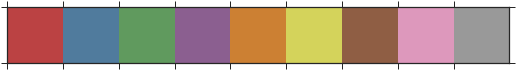

In [9]:
sns.palplot(sns.color_palette('Set1', 9, desat=0.6))

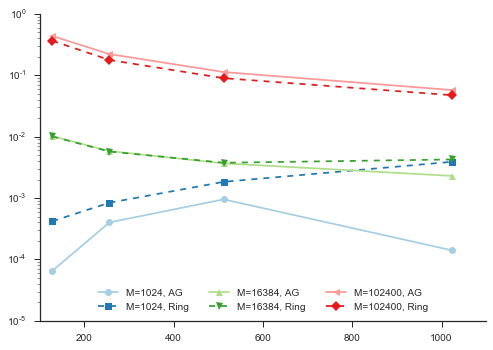

In [10]:
shapes = cycle(('o', 's', '^', 'v', '<', 'D'))

with sns.color_palette('Paired'):
    for i, (m, df) in enumerate(res.groupby('matsize')):
        plt.plot(df.nproc, df.agtime, marker=next(shapes), label='M={}, AG'.format(m))
        plt.plot(df.nproc, df.ringtime, marker=next(shapes), linestyle='--', label='M={}, Ring'.format(m))

    plt.semilogy()
    
    sns.despine()
#     plt.grid(which='both')
    
    plt.legend(loc=8, ncol=3)

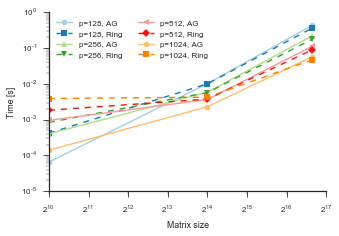

In [97]:
shapes = cycle(('o', 's', '^', 'v', '<', 'D'))

plt.figure(figsize=(345/72, 345/72*0.7))

with sns.color_palette('Paired', 8):
    for i, (m, df) in enumerate(res.groupby('nproc')):
        plt.plot(df.matsize, df.agtime, marker=next(shapes), label='p={:.0f}, AG'.format(m))
        plt.plot(df.matsize, df.ringtime, marker=next(shapes), linestyle='--', label='p={:.0f}, Ring'.format(m))

    plt.loglog(basex=2)
    
    sns.despine()
#     plt.grid(which='both')
    
    plt.legend(loc=2, ncol=2)
    plt.xlabel('Matrix size')
    plt.ylabel('Time [s]')
    
    plt.tight_layout()
    plt.savefig('data.pdf')

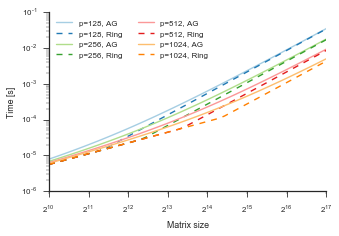

In [99]:
plt.figure(figsize=(345/72, 345/72*0.7))

with sns.color_palette('Paired', 9):
    xs = np.logspace(10, 17, base=2)
    for p in res.nproc.unique():
        plt.plot(xs, ag_model(xs, p), label='p={:.0f}, AG'.format(p))
        plt.plot(xs, [ring_model(m, p) for m in xs], '--', label='p={:.0f}, Ring'.format(p))

    plt.loglog(basex=2)
    
    sns.despine()
    plt.legend(loc=2, ncol=2)
    
    plt.xlabel('Matrix size')
    plt.ylabel('Time [s]')
    
    plt.tight_layout()
    plt.savefig('model.pdf')

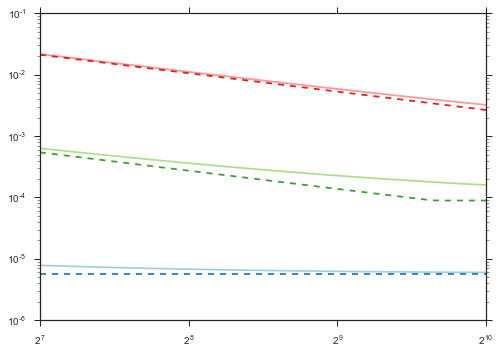

In [55]:
with sns.color_palette('Paired', 9):
    xs = np.logspace(7, 10, base=2)
    for m in res.matsize.unique():
        plt.plot(xs, ag_model(m, xs))
        plt.plot(xs, [ring_model(m, p) for p in xs], '--')

    plt.loglog(basex=2)
#     plt.semilogy()

In [77]:
def compute_time(m, p, r=7.8e-11, c=5.1e-11):
    return 2*m**2 / p * (r+c) + 2 * m * r

def net_time(m, p, r=6.8e-10):
    return r * 8 * m / p

def ag_model(m, p):
    return net_time(m, p) * p + compute_time(m, p)

def ring_model(m, p):
    return max(p * net_time(m, p), compute_time(m, p))

In [18]:
compute_time(102400, 512)

0.0052998144

In [19]:
net_time(102400, 512)

1.088e-06

In [ ]:
xs = np.